# Part II - Ford GoBike System Data Analysis
### by _Mlungiseleli Notshokovu_


## Investigation Overview

The goal of this presentation is to visualize key insights derived from the Bike Share Trip data.


## Dataset Overview

The dataset will show how trips are split across different users (Customer/Subscriber) and how the trip duration is affected by the user's age

It will also help visualize the following insights:
- Customers have the highest trip duration, but Subscribers are more consistent with bike trips throughout the week.
- There is usually an increase of customers over the weekend compared to weekdays
- Age seems to be a determining factor for trip duration. The younger you are, the higher the trip duration

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_share_clean = pd.read_csv('bike_share_clean.csv')
bike_share_clean.head()

,start_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_mins,start_hour,day,age,time_of_day
0,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No,869.75,17,Thursday,35,Evening
1,2019-02-28 12:13:13.218,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No,1030.90,12,Thursday,47,Afternoon
2,2019-02-28 17:54:26.010,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No,608.17,17,Thursday,30,Evening
3,2019-02-28 23:54:18.549,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes,26.42,23,Thursday,45,Night
4,2019-02-28 23:49:58.632,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No,29.88,23,Thursday,60,Night


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

A histogram showing that the age of most members is between 20-40. This could suggest that a lot of the members use bikes for most of their travels throughout the day, i.e commuting to work, going to the nearest coffee shop, etc

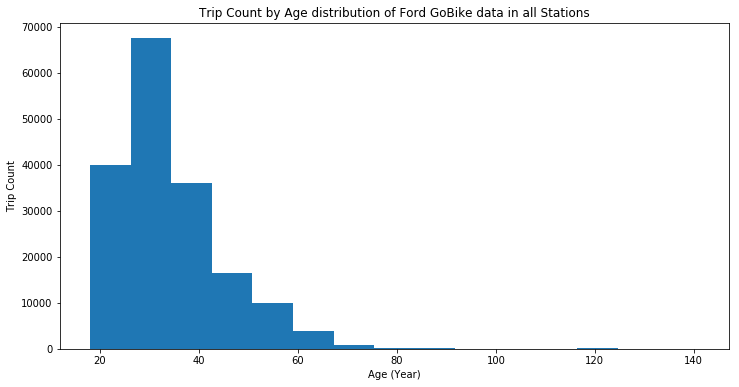

In [9]:
#plotting a histogram to check the count for particular age 
plt.figure(figsize=(12,6))
plt.hist(bike_share_clean['age'],bins = 15);
plt.title('Trip Count by Age distribution of Ford GoBike data in all Stations');
plt.xlabel('Age (Year)');
plt.ylabel('Trip Count');

## (Visualization 2)

Now we want to see what happens when the number of bins increase to get a more clear picture of the age distribution.
- The distribution clearly shows that on average, members are between 30-40 years 

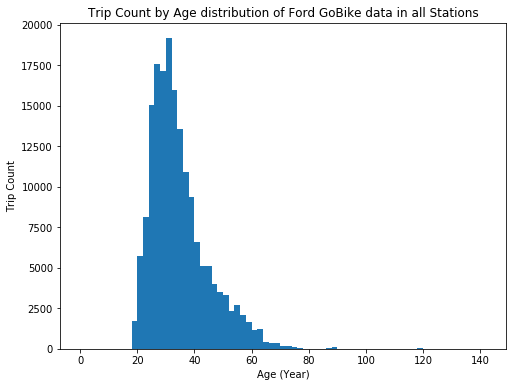

In [8]:
plt.figure(figsize=(8,6))
bins = np.arange(0, bike_share_clean['age'].max()+2, 2)
plt.hist(data=bike_share_clean, x='age', bins=bins)
plt.xlabel('Age (Year)')
plt.ylabel('Trip Count')
plt.title('Trip Count by Age distribution of Ford GoBike data in all Stations');

## (Visualization 3)

Bar graphs showing the spread of trip duration over the week by time of day (morning, afternoon, evening, and night)
- A lot of trips occur in the morning, with a consistent spread during the afternoon and evening
- Not a lot of trips occur during the night

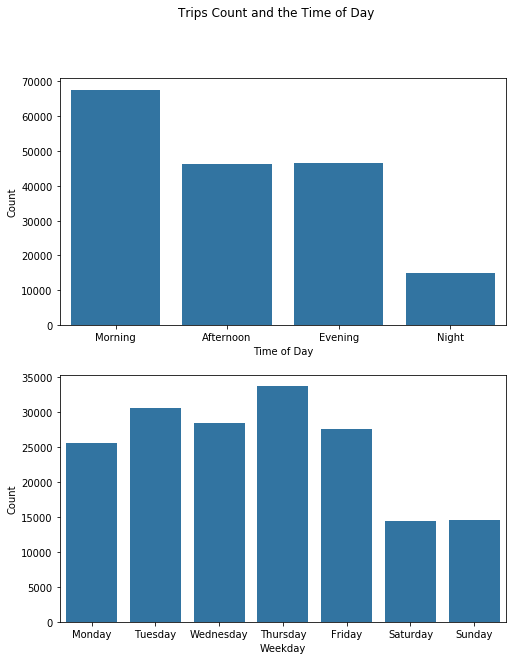

In [9]:
fig, ax = plt.subplots(nrows=2, figsize = [8,10])
default_color = sb.color_palette()[0]
order_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
order_time = ['Morning', 'Afternoon', 'Evening', 'Night']
sb.countplot(data = bike_share_clean, x = 'time_of_day', color = default_color, ax = ax[0], order = order_time)
sb.countplot(data = bike_share_clean, x = 'day', color = default_color, ax = ax[1], order = order_day)
ax[0].set_xlabel('Time of Day')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Weekday')
ax[1].set_ylabel('Count')
fig.suptitle('Trips Count and the Time of Day');

## (Visualization 4)

Bar graph showing the spread of gender across the two user types
- There are more Subscribers compared to Customers
- There are more Male users compared to Females

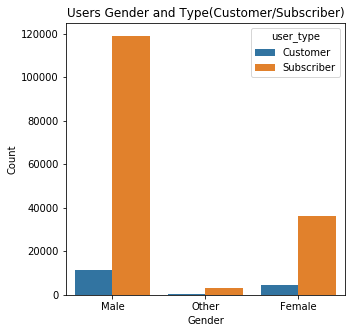

In [10]:
plt.figure(figsize = [5, 5]);

sb.countplot(data = bike_share_clean, x = 'member_gender', hue = 'user_type');
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Users Gender and Type(Customer/Subscriber)');

## (Visualization 5)

Pie Chart showing the spread of genders across all users
- 75% of users are Male
- 23% of users are Female
- 2% of users are 'Other' (gender not specified)

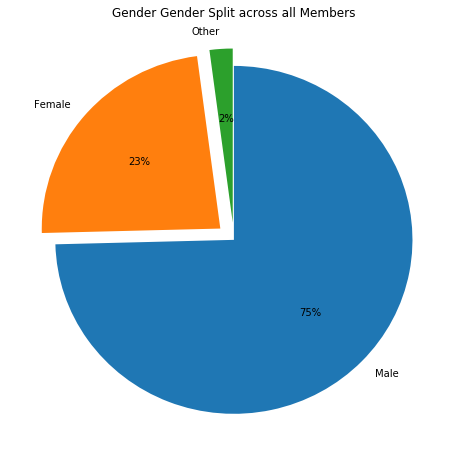

In [11]:
# plotting a pie 
plt.figure(figsize=(8,8))
gender_counts = bike_share_clean['member_gender'].value_counts()

plt.pie(gender_counts, labels = ['Male','Female','Other'], startangle = 90,explode =(0 , 0.1, 0.1)  ,
        counterclock = False, autopct='%.0f%%');
plt.title('Gender Gender Split across all Members');

## (Visualization 6)
Line graph show the relationship spread of trip duration by user type (Customer/Subscriber) throughout the week
- Customers have a higher average trip duration than Subscribers
- There is a huge increase of Customer trip duration over the weekend
- Subscribers have a consistent trip duration throughout the week

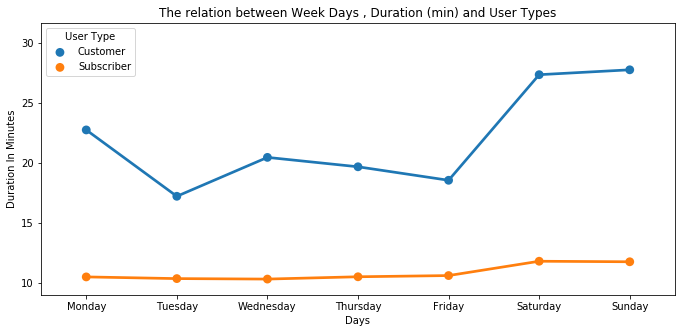

In [13]:
plt.figure(figsize=[25, 5])
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
plt.subplot(1, 2, 1)
sb.pointplot(data=bike_share_clean, x='day', y='duration_mins', hue='user_type', errwidth=0, order=order)
plt.xlabel('Days')
plt.ylabel('Duration In Minutes')
plt.title('The relation between Week Days , Duration (min) and User Types')
plt.legend(title='User Type');

In [ ]:
!jupyter nbconvert "part_II_slide_deck.ipynb" --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 410588 bytes to part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 